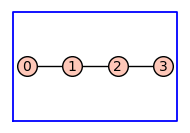

In [1]:
G = graphs.PathGraph(4)
G.show(figsize=2,graph_border=True)

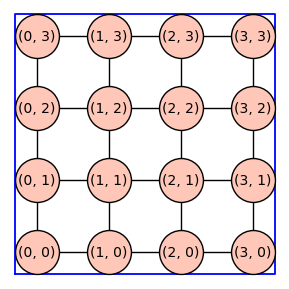

In [2]:
GG = G.cartesian_product(G)
pos = {v: v for v in GG.vertices(sort=True)}
GG.set_pos(pos)
GG.show(figsize=4,vertex_size=1000,graph_border=True)

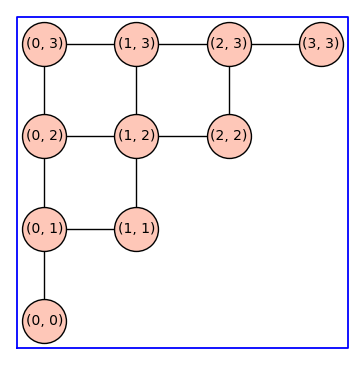

In [3]:
G2 = GG.copy()
for v in G2.vertices(sort=True):
    for u in G2.vertices(sort=True):
        sv=tuple(sorted(v))
        su=tuple(sorted(u))
        if v!=u and sv==su and v<u and G2.has_vertex(v) and G2.has_vertex(u):
            G2.merge_vertices([v,u])
G2.show(figsize=5,vertex_size=1000,graph_border=True)

In [4]:
def reduced_Cartesian_square(G):
    r"""
    Return the **reduced Cartesian square** of a graph.

    INPUT:

    - ``G`` -- graph; the description of the
      argument ``x`` goes here. If it contains multiple lines, all
      the lines after the first need to begin at the same indentation
      as the backtick.
      
    OUTPUT: The reduced Cartesian square ``G2``.

    EXAMPLES:

    This example illustrates ... ::

        sage: A = ModuliSpace()
        sage: A.point(2,3)
        xxx

    We now ... ::

        sage: B = A.point(5,6)
        sage: xxx

    It is an error to ... ::

        greg: xxx
        kristin: ooo
    """
    GG = G.cartesian_product(G)
    G2 = GG.copy()
    for v in G2.vertices(sort=True):
        for u in G2.vertices(sort=True):
            sv=tuple(sorted(v))
            su=tuple(sorted(u))
            if v!=u and sv==su and v<u and G2.has_vertex(v) and G2.has_vertex(u):
                G2.merge_vertices([v,u])
    return G2

In [5]:
import inspect
from IPython.display import display, Markdown, Latex, display_markdown

display(Markdown(inspect.getdoc(reduced_Cartesian_square)))

Return the **reduced Cartesian square** of a graph.

INPUT:

- ``G`` -- graph; the description of the
  argument ``x`` goes here. If it contains multiple lines, all
  the lines after the first need to begin at the same indentation
  as the backtick.
  
OUTPUT: The reduced Cartesian square ``G2``.

EXAMPLES:

This example illustrates ... ::

    sage: A = ModuliSpace()
    sage: A.point(2,3)
    xxx

We now ... ::

    sage: B = A.point(5,6)
    sage: xxx

It is an error to ... ::

    greg: xxx
    kristin: ooo

In [6]:
import inspect
import re
doc_plus_code = inspect.getsource(reduced_Cartesian_square)
code = re.sub(r'r"""[\s\S]*?"""', '', doc_plus_code)
print(code)

def reduced_Cartesian_square(G):
    
    GG = G.cartesian_product(G)
    G2 = GG.copy()
    for v in G2.vertices(sort=True):
        for u in G2.vertices(sort=True):
            sv=tuple(sorted(v))
            su=tuple(sorted(u))
            if v!=u and sv==su and v<u and G2.has_vertex(v) and G2.has_vertex(u):
                G2.merge_vertices([v,u])
    return G2



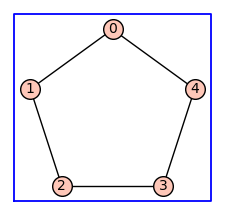

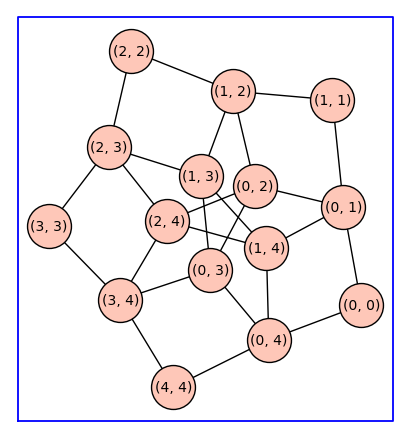

In [7]:
G = graphs.CycleGraph(5)
G.show(figsize=3,graph_border=True)
G2 = reduced_Cartesian_square(G)
G2.show(figsize=6,vertex_size=1000,graph_border=True)


In [8]:
def Cartesian_power(G, k=2):
    # Make Cartesian power G^k (unreduced)
    Gk=G.copy()
    for i in range(k-1):
        Gk = Gk.cartesian_product(G)
    # Make each vertex a tuple
    vflat=list(range(Gk.order()));
    for i in range(Gk.order()):
        v=Gk.vertices(sort=True)[i]
        vflat[i]=tuple(flatten(v))
    Gk.relabel(vflat)
    return Gk

In [9]:
GGG = Cartesian_power(graphs.PathGraph(4),3)
GGG.show3d()

Graphics3d Object

In [10]:
def reduced_Cartesian_power(G, k=2):
    Gk = Cartesian_power(G, k)
    for v in Gk.vertices(sort=True):
        for u in Gk.vertices(sort=True):
            sv=tuple(sorted(v))
            su=tuple(sorted(u))
            if v!=u and sv==su and v<u and Gk.has_vertex(v) and Gk.has_vertex(u):
                Gk.merge_vertices([v,u])
    return Gk

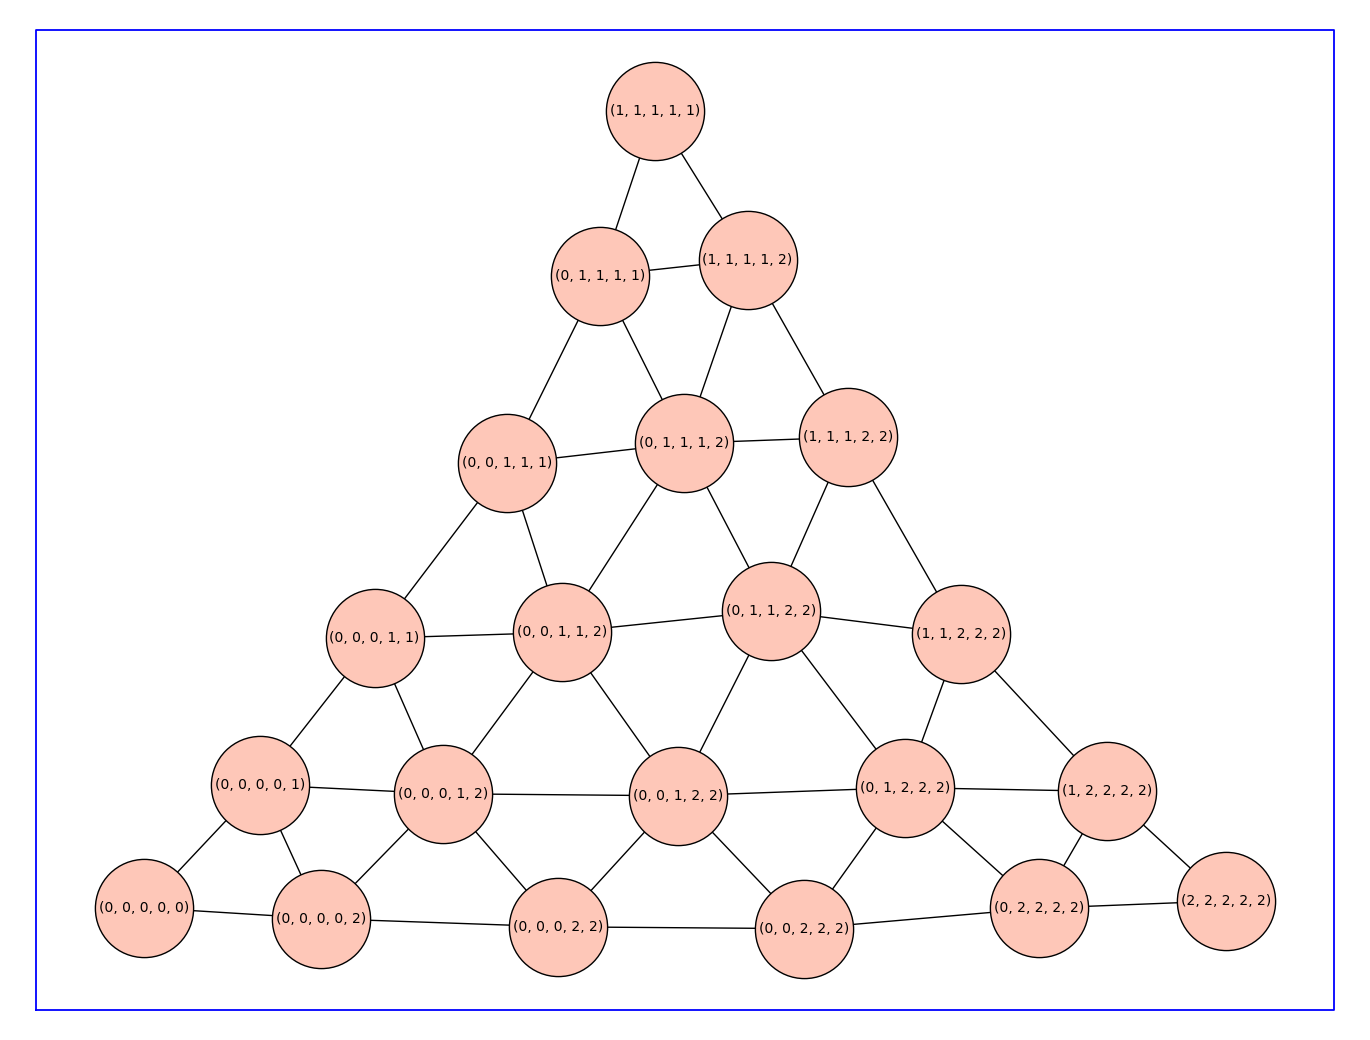

In [11]:
G3 = reduced_Cartesian_power(graphs.CycleGraph(3),5)
G3.show(figsize=14,vertex_size=5000,graph_border=True)